In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from plotnine import *

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (11, 4)
%matplotlib inline

In [2]:
data = pd.read_csv('csv/treinamento.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rodada                   1257 non-null   object 
 1   Data                     1257 non-null   object 
 2   Sem                      996 non-null    float64
 3   Edicao                   1257 non-null   int64  
 4   Casa                     1257 non-null   object 
 5   Visitante                1257 non-null   object 
 6   Nacionalidade Casa       1257 non-null   object 
 7   Nacionalidade Visitante  1257 non-null   object 
 8   Resultado                1257 non-null   int64  
 9   Gols Casa                1257 non-null   int64  
 10  Gols Visitante           1257 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 108.1+ KB


-----
# Explorando os Dados
## Algumas indagações para nortear o estudo
+ Quais times mais vitoriosos?
    + Em número de jogos
    + Em número de competições 
+ Quais nacionalidades dos times mais vitoriosos?
+ Buscar entender o comportamento dos números de gols, a partir de análises descritivas:
    + Esperança
    + Desvio padrão
    + Distribuição
    + Outliers
+ Jogar em casa realmente é como jogar com 12 em campo?
    + Temos como provar com um teste de hipótese? 
+ Teve alguma mudança do comportamento da Libertadores durante esses anos?

In [4]:
data

,Rodada,Data,Sem,Edicao,Casa,Visitante,Nacionalidade Casa,Nacionalidade Visitante,Resultado,Gols Casa,Gols Visitante
0,Fase de Grupos,2014-01-28,1.0,2014,Oriente Petrolero,Nacional,bo,uy,1,1,0
1,Fase de Grupos,2014-01-28,1.0,2014,Morelia,Santa Fe,mx,co,1,2,1
2,Fase de Grupos,2014-01-29,1.0,2014,Sporting Cristal,Atl Paranaense,pe,br,1,2,1
3,Fase de Grupos,2014-01-29,1.0,2014,SD Quito,Botafogo (RJ),ec,br,1,1,0
4,Fase de Grupos,2014-01-30,1.0,2014,Univ Chile,Guaraní,cl,py,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1252,Fase de Grupos,2023-06-28,6.0,2023,Flamengo,SD Aucas,br,ec,1,4,0
1253,Fase de Grupos,2023-06-28,6.0,2023,Corinthians,Liverpool,br,uy,1,3,0
1254,Fase de Grupos,2023-06-28,6.0,2023,Racing Club,Ñublense,ar,cl,1,4,0
1255,Fase de Grupos,2023-06-29,6.0,2023,Barcelona SC,Cerro Porteño,ec,py,0,2,2


-----
## Quais times mais vitoriosos?

### Em número de vitórias

In [5]:
casa = data[["Casa", "Gols Casa", "Resultado"]]

In [6]:
casa.head()

,Casa,Gols Casa,Resultado
0,Oriente Petrolero,1,1
1,Morelia,2,1
2,Sporting Cristal,2,1
3,SD Quito,1,1
4,Univ Chile,1,1


In [7]:
vitorias_casa = casa.loc[casa["Resultado"] == 1]
vitorias_casa = vitorias_casa.groupby("Casa")[["Gols Casa", "Resultado"]].sum()
vitorias_casa.head()

,Gols Casa,Resultado
Casa,,
AD Cali,8,4
Always Ready,6,3
Argentinos Jun,6,4
Arsenal,7,3
Atl Paranaense,36,17


In [8]:
visitante = data[["Visitante", "Gols Visitante", "Resultado"]]
# vitória na visão do visitante é "-1"
vitorias_visitante = visitante.loc[visitante["Resultado"] == -1]
vitorias_visitante = vitorias_visitante.groupby("Visitante")[["Gols Visitante", "Resultado"]].sum()
# tirando o modulo
vitorias_visitante["Resultado"] = vitorias_visitante["Resultado"].abs()
vitorias_visitante.head()

,Gols Visitante,Resultado
Visitante,,
Alianza Lima,2,1
Argentinos Jun,5,3
Arsenal,4,2
Atl Paranaense,11,6
Atlas,1,1


In [9]:
rename_index_names ={"Casa": "Time", "Visitante": "Time"}
vitorias_em_geral = pd.merge(vitorias_casa[["Gols Casa"]], vitorias_visitante[["Gols Visitante"]], left_index=True, right_index=True)
vitorias_em_geral["Resultado"] = vitorias_casa["Resultado"] + vitorias_visitante["Resultado"]
vitorias_em_geral.head()

,Gols Casa,Gols Visitante,Resultado
Argentinos Jun,6,5,7.0
Arsenal,7,4,5.0
Atl Paranaense,36,11,23.0
Atlas,1,1,2.0
Atlético Mineiro,54,21,33.0


In [10]:
vitorias_em_geral.sort_values(by="Resultado", ascending=False, inplace=True)

top_n = 10
top_n_vitoriosos_jogos = vitorias_em_geral.iloc[:top_n]

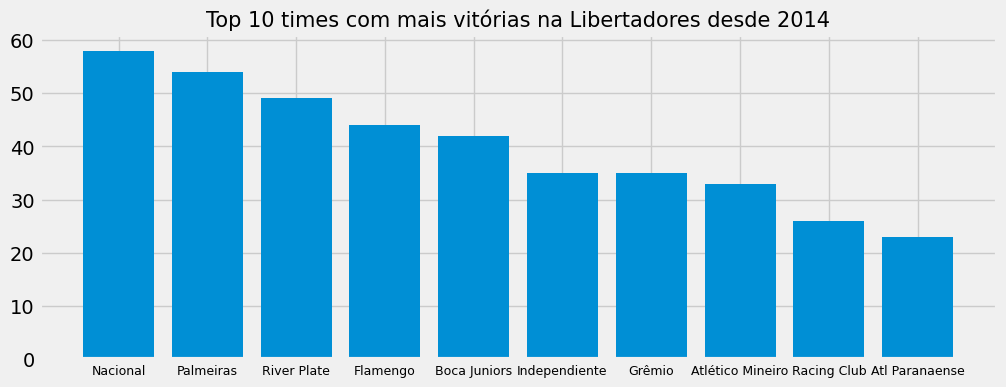

In [11]:
plt.figure()
plt.bar(x=top_n_vitoriosos_jogos.index, height=top_n_vitoriosos_jogos["Resultado"])
plt.xticks(size=9)
plt.title(f"Top {top_n} times com mais vitórias na Libertadores desde 2014", size=15);

#### Meu palmeiras segue como o segundo time com maior número de vitórias desde 2014, atrás apenas do Nacional

### Em número de títulos

In [12]:
finais = data[data["Rodada"] == "Final"]
vencedores_libertadores_2014_2022 = pd.concat(
    [finais.loc[finais["Resultado"] == 1][["Edicao", "Casa"]].rename(columns=rename_index_names), # os que venceram em casa
    finais.loc[finais["Resultado"] == -1][["Edicao", "Visitante"]].rename(columns=rename_index_names)] # os que venceram fora de casa
)

vencedores_libertadores_2014_2022.sort_values("Edicao", inplace=True)

In [13]:
vencedores_libertadores_2014_2022

,Edicao,Time
136,2014,San Lorenzo
273,2015,River Plate
410,2016,Nacional
535,2017,Grêmio
660,2018,River Plate
785,2019,Flamengo
910,2021,Palmeiras
1035,2021,Palmeiras
1160,2022,Flamengo


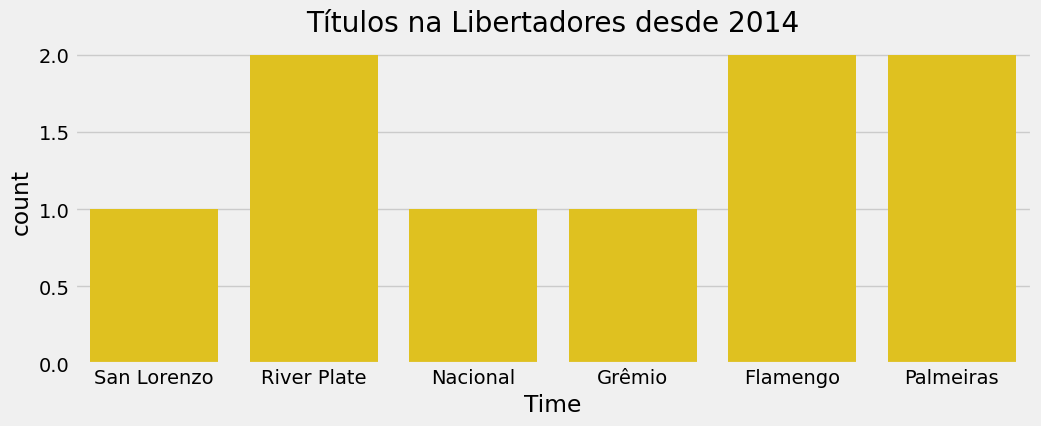

In [14]:
import seaborn as sns
sns.countplot(data=vencedores_libertadores_2014_2022, x="Time", color="gold")
plt.title("Títulos na Libertadores desde 2014");

+ River, Palmeiras e Flamengo com 3 títulos nesses 9 anos e San Lorenzo, Grêmio e Nacional com 1 cada.

+ Podemos apontar um fato interessante, mesmo que o Nacional tenha mais jogos ganhos que River, Palmeiras e Flamengo, ainda assim tem menos títulos.

+ Outro ponto é que um dos títulos veio do San Lorenzo, que não pertence aos 10 times com mais vitórias nesse período, seriam eles azarões?

------
## Quais nacionalidades dos times mais vitoriosos?

In [15]:
casa = data[["Nacionalidade Casa", "Gols Casa", "Resultado"]]
vitorias_casa = casa.loc[casa["Resultado"] == 1]
vitorias_casa = vitorias_casa.groupby("Nacionalidade Casa")[["Gols Casa", "Resultado"]].sum()

visitante = data[["Nacionalidade Visitante", "Gols Visitante", "Resultado"]]
# vitória na visão do visitante é "-1"
vitorias_visitante = visitante.loc[visitante["Resultado"] == -1]
vitorias_visitante = vitorias_visitante.groupby("Nacionalidade Visitante")[["Gols Visitante", "Resultado"]].sum()
vitorias_visitante["Resultado"] = vitorias_visitante["Resultado"].abs()

rename_index_names ={"Nacionalidade Casa": "Nacionalidade", "Nacionalidade Visitante": "Nacionalidade"}
vitorias_em_geral = pd.merge(vitorias_casa[["Gols Casa"]], vitorias_visitante[["Gols Visitante"]], left_index=True, right_index=True)
vitorias_em_geral["Resultado"] = vitorias_casa["Resultado"] + vitorias_visitante["Resultado"]
vitorias_em_geral.head()

,Gols Casa,Gols Visitante,Resultado
Nacionalidade Casa,,,
ar,381,166,232
bo,99,8,48
br,517,244,303
cl,60,24,43
co,100,61,72


In [16]:
vitorias_em_geral.sort_values(by="Resultado", ascending=False, inplace=True)

finais = data[data["Rodada"] == "Final"]
vencedores_libertadores_2014_2022 = pd.concat(
    [finais.loc[finais["Resultado"] == 1][["Edicao", "Nacionalidade Casa"]].rename(columns=rename_index_names), # os que venceram em casa
    finais.loc[finais["Resultado"] == -1][["Edicao", "Nacionalidade Visitante"]].rename(columns=rename_index_names)] # os que venceram fora de casa
)

vencedores_libertadores_2014_2022.sort_values("Edicao", inplace=True)

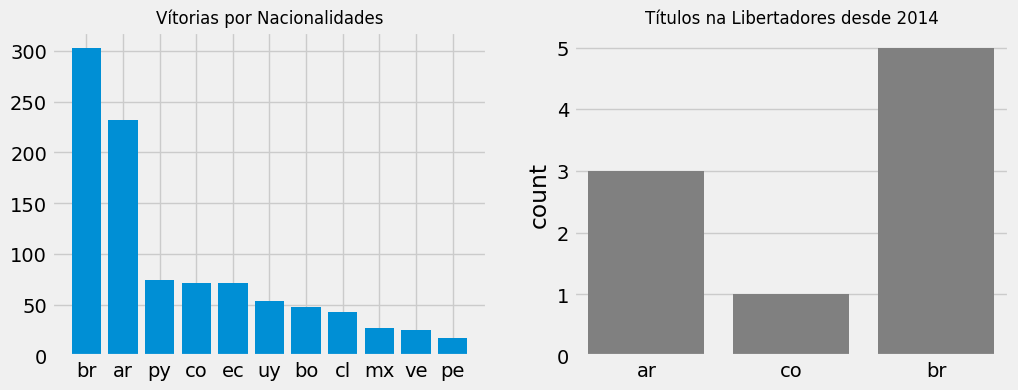

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(x=vitorias_em_geral.index, height=vitorias_em_geral["Resultado"])
ax1.set_title("Vítorias por Nacionalidades", size=12)

sns.countplot(data=vencedores_libertadores_2014_2022, x="Nacionalidade", color="gray", ax=ax2)
ax2.set_title("Títulos na Libertadores desde 2014", size=12)
ax2.set_xlabel("");

Portando nosso Brasil ganhou mais vezes jogos como também títulos, empilhando mais de 300 vitórias e 5 títulos. Seguido pelos hermanos com mais de 225 vitórias e 3 títulos e por fim a Colômbia tem 1 título com o Nacional.

---------
## Buscar entender o comportamento dos números de gols, a partir de análises descritivas

### Esperança

In [18]:
gols = data["Gols Casa"].sum() + data["Gols Visitante"].sum()
print("Gols marcados em jogos pela Libertadores desde 2014: ", gols)
print("Número de jogos: ", data.shape[0])

Gols marcados em jogos pela Libertadores desde 2014:  3222
Número de jogos:  1257


In [19]:
print(f"Esperança: média de gols esperado por jogo - {gols/data.shape[0]:.3}")

Esperança: média de gols esperado por jogo - 2.56


In [20]:
gols_casa = data["Gols Casa"]
gols_fora = data["Gols Visitante"]

media_gols_casa = gols_casa.sum()/data.shape[0]
media_gols_visitante = gols_fora.sum()/data.shape[0]

print(f"Esperança Casa: média de gols esperado pelo time da Casa por jogo - {media_gols_casa:.3}")
print(f"Esperança Visitante: média de gols esperado pelo time Visitante por jogo - {media_gols_visitante:.3}")

Esperança Casa: média de gols esperado pelo time da Casa por jogo - 1.6
Esperança Visitante: média de gols esperado pelo time Visitante por jogo - 0.96


#### É esperado que o time anfitrião marque em média 0.6 gols a mais que o time visitante. Será que isso é estatísticamente significante ou então causado pela aleatóriedade das partidas?

### Desvio padrão

In [21]:
gols = pd.concat([data["Gols Casa"], data["Gols Visitante"]])

In [22]:
print(f"Desvio padrão Casa: o quanto os gols se dispersão da média do time da Casa - {np.std(gols_casa):.3}")
print(f"Desvio padrão Visitante: o quanto os gols se dispersão da média do time Visitante - {np.std(gols_fora):.3}")
print(f"Desvio padrão: o quanto os gols se dispersão da média no geral - {np.std(gols):.3}")

Desvio padrão Casa: o quanto os gols se dispersão da média do time da Casa - 1.41
Desvio padrão Visitante: o quanto os gols se dispersão da média do time Visitante - 1.04
Desvio padrão: o quanto os gols se dispersão da média no geral - 1.28


#### Quando os times jogão em casa, temos uma disperção maior, isto é, o resultado pelo lado deles pode variar bastante marcando menos ou mais gols. 

#### Para ficar mais claro vamos observar a distribuição por meio dos histogramas.

### Distribuições

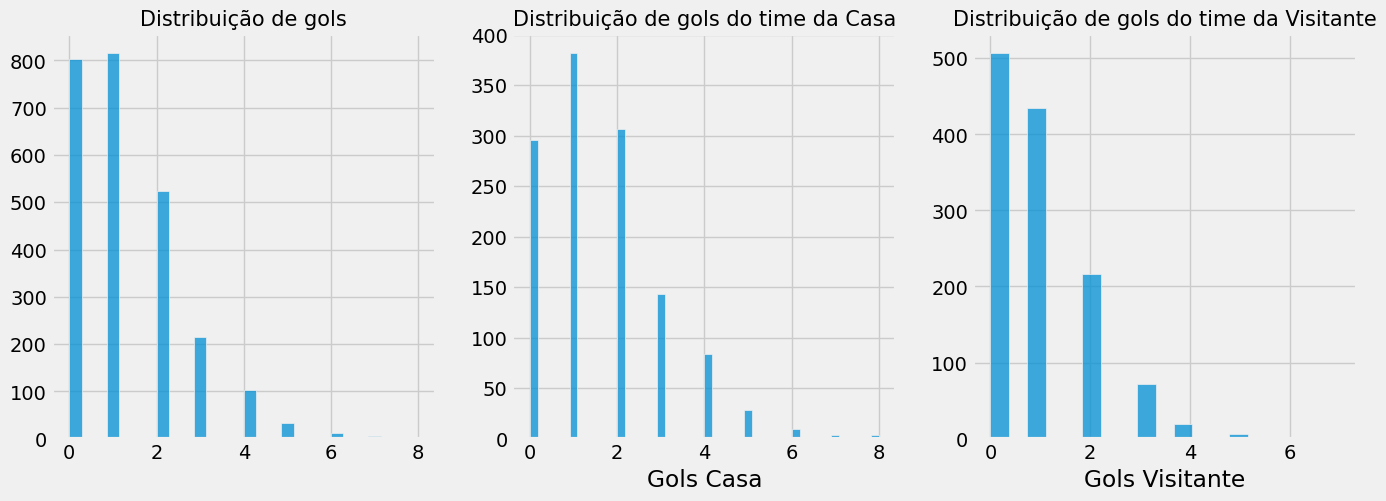

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(gols, ax=ax1)
ax1.set_title("Distribuição de gols", size=15)
ax1.set_ylabel("")

sns.histplot(gols_casa, ax=ax2)
ax2.set_title("Distribuição de gols do time da Casa", size=15)
ax2.set_ylabel("")

sns.histplot(gols_fora, ax=ax3)
ax3.set_title("Distribuição de gols do time da Visitante", size=15)
ax3.set_ylabel("");

#### Observando as distribuições juntas

In [24]:
# get colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 
colors

['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']

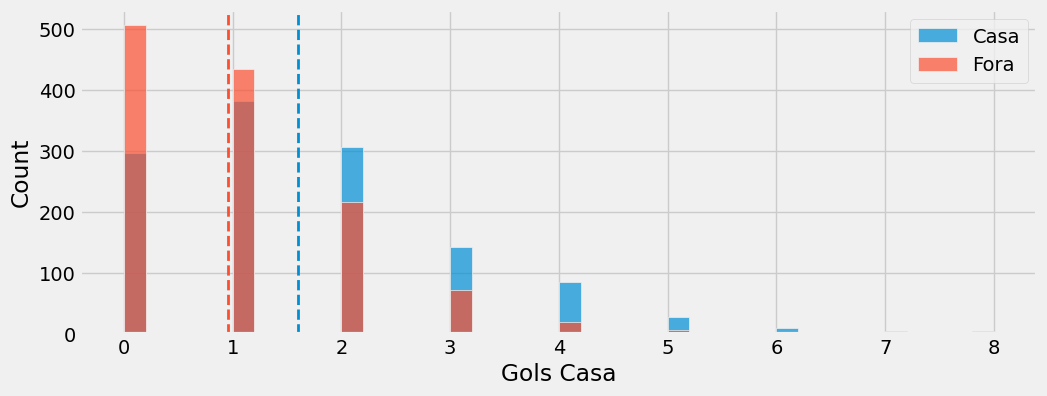

In [25]:
plt.figure()
sns.histplot(gols_casa, label="Casa", binwidth=.2, alpha=.7)
plt.axvline(x=media_gols_casa, lw=2, ls="--")
sns.histplot(gols_fora, label="Fora", binwidth=.2, alpha=.7)
plt.axvline(x=media_gols_visitante, lw=2, ls="--", color='#fc4f30')
plt.legend();

#### Ou seja, quando os times jogam fora, na maioria das vezes não marcam gols enquanto o outro time tende a marcar pelo menos 1 gol. 
#### E ainda mais, as ocorrências de "goleadas" é muito mais favoráel aos times anfitriões.

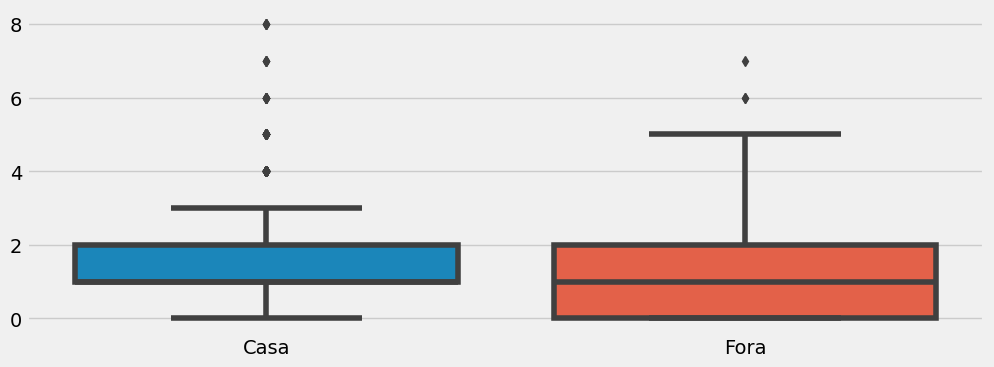

In [26]:
plt.figure()
sns.boxplot([gols_casa, gols_fora])
plt.xticks(ticks=[0, 1], labels=['Casa', 'Fora']);

Isso se mostra aqui, há mais ***Outliers*** pra **Casa** que pra **Fora**.

-------
## Jogar em casa realmente é como jogar com 12 em campo?

Ao que tudo parece, sim, mas vamos realizar um teste de hipótese para estatísticamente falando, afirmar se há mesmo uma vantagem jogar em casa ou não.

---------
# Testes de Hipótese | Teste A/B

$$H_0: \mu_{casa}=\mu_{fora}$$
$$H_0: \mu_{casa}\neq\mu_{fora}$$

$\mu_{casa}$: esperança de gols jogando em casa, $\mu_{fora}$: esperança de gols jogando em fora de casa.

## Teste de Permutação

*Essa metodologia para testar hipóteses, é dada da seguinte maneira:*

1. Combine os resultado dos diferentes grupos em único conjunto de dados
2. Embaralhe os dados combinados, então extraia aleatoriamente (sem reposição) uma reamostra de tamanho igual ao do grupo A
3. Dos dados restantes, extraia aleatoriamente (sem reposição) uma reamostra de tamanho igual ao do grupo B
4. Seja qual for a estatística ou estimativa calculada para amostras origiais (por exemplo, diferença da proporção de grupos), calcule-a agora para as reamostras e registre. Isso contitui uma iteração de permutação
5. Repita os passos anteriores R vezes para produzir uma distribuição de permutação da estatística teste.

*Agora volte a diferença observada entre os grupos e compare ao conjunto das diferenças permutadas. Se a diferença observada estiver dentro do conjunto de diferenças permutadas, então não provamos nada - a diferença observada está dentro do intervalo do que o acaso pode produzir*

*(Definição de Peter e Andrew Bruce, Estatística Prática para Ciência de Dados)*



**Basicamente aceitamos a hipótese nula, de que a diferença das médias de gols dentro e fora de casa são iguais e portanto caso o conjunto combinado não consiga produzir resultados semelhantes, poderemos disconsiderar nossa hipótese e provaremos que realmente tem diferença.**

Vamos calcular a diferença real:

In [27]:
diferenca_medias = gols_casa.mean() - gols_fora.mean()
diferenca_medias

0.6428003182179794

In [28]:
# semente aleatória
np.random.seed(911)

In [29]:
# 1. já temos o conjunto combinado
gols = gols.reset_index(drop=True)
gols

0       1
1       2
2       2
3       1
4       1
       ..
2509    0
2510    0
2511    0
2512    2
2513    0
Length: 2514, dtype: int64

In [30]:
N_casa = len(gols_casa) # amostra casa
N_fora = len(gols_fora) # amostra fora
N = N_casa + N_fora # tamanho das amostras combinadas

resultados = [] # lista para salvar resultados

for iter in range(1000):   
    idx_amostra1 = np.random.choice(np.arange(0, N), N_casa, replace=False) # 2.
    idx_amostra2 = [idx for idx in np.arange(0, N) if idx not in idx_amostra1] # 3.
    
    diferenca_medias_iter = np.mean(gols.loc[idx_amostra1]) - np.mean(gols.loc[idx_amostra2]) # 4.

    resultados.append(diferenca_medias_iter)

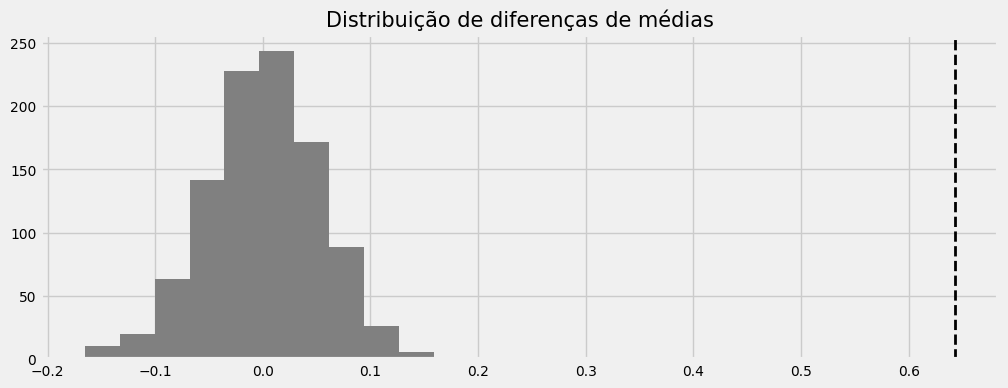

In [31]:
plt.figure()
plt.hist(resultados, color="gray")
plt.axvline(x=diferenca_medias, color="k", lw=2,ls='--')
plt.title("Distribuição de diferenças de médias", fontdict={'size': 15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

#### Realmente, jogar em casa é vantajoso estatísticamente falando!
#### Respondendo a pergunta: jogar em casa realmente é como jogar com 12 em campo?
Ao que tudo indica sim, jogar em casa é como jogar com 12 ou até mais no time. 

## Teste de permutação *bootstrap*

Segue o mesmo princípio do teste de permutação simples, mas adiciona o elemento aleatório na seleção dos objetos da população.

In [32]:
resultados = [] # lista para salvar resultados

for iter in range(1000):   
    idx_amostra1 = np.random.choice(np.arange(0, N), N_casa, replace=True) # 2. - Agora com reamostragem (bootstrap)
    idx_amostra2 = [idx for idx in np.arange(0, N) if idx not in idx_amostra1] # 3.
    
    diferenca_medias_iter = np.mean(gols.loc[idx_amostra1]) - np.mean(gols.loc[idx_amostra2]) # 4.

    resultados.append(diferenca_medias_iter)

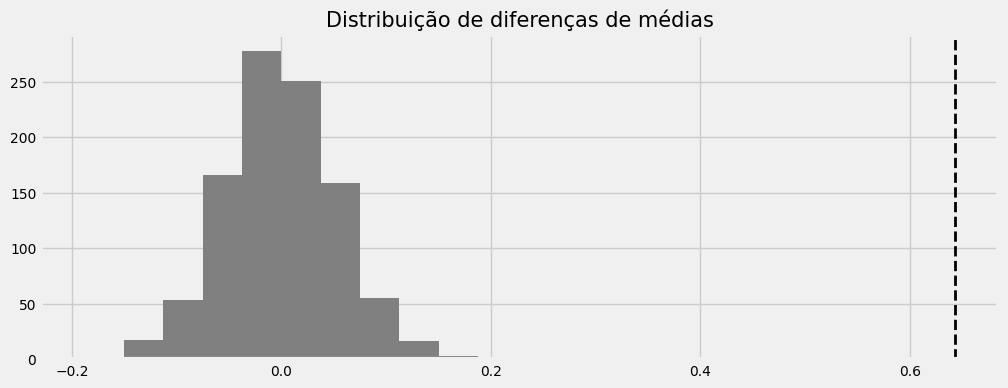

In [33]:
plt.figure()
plt.hist(resultados, color="gray")
plt.axvline(x=diferenca_medias, color="k", lw=2, ls='--')
plt.title("Distribuição de diferenças de médias", fontdict={'size': 15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

Seguimos rejeitando a hipótese nula. 

As curvas que suportam a hipótese nula se assemelham muito, mas essa agora um pouco mais concetrada em 0.

### Usando biblioteca scipy

In [34]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

In [35]:
from scipy.stats import permutation_test
# because our statistic is vectorized, we pass `vectorized=True`
# `n_resamples=np.inf` indicates that an exact test is to be performed
res = permutation_test((gols_casa, gols_fora), statistic, vectorized=True,
                       n_resamples=1000, alternative='greater')
print("Estatística do teste: ", res.statistic)
print("p-valor: ", res.pvalue)

Estatística do teste:  0.6428003182179794
p-valor:  0.000999000999000999


### Valor-p
Dado que estamos alinhados com a hipótese nula, o **valor-p** nos diz qual a probabilidade de que o observado realmente foi decorrido do acaso.

In [36]:
valor_p = np.mean(resultados > diferenca_medias)
valor_p

0.0

Portanto estatísticamente falando, dado o modelo do acaso, o valor p informou que a probabilidade está próxima de zero de observamos tal diferença.

## Teste t-pareado
Teste de hipótese para comparar duas amostras.

### Definição da biblioteca: 

*Calculate the t-test on TWO RELATED samples of scores, a and b.*

*
This is a test for the null hypothesis that two related or repeated samples have identical average (expected) vales**s.

In [37]:
from scipy.stats import ttest_rel
res = ttest_rel(gols_casa, gols_fora, alternative='greater')

print("Estatística do teste: ", res.statistic)
print("p-valor: ", res.pvalue)

Estatística do teste:  12.521595037918033
p-valor:  2.7712271003436646e-34


-----
## Teve alguma mudança do comportamento da Libertadores durante esses anos?

In [38]:
data

,Rodada,Data,Sem,Edicao,Casa,Visitante,Nacionalidade Casa,Nacionalidade Visitante,Resultado,Gols Casa,Gols Visitante
0,Fase de Grupos,2014-01-28,1.0,2014,Oriente Petrolero,Nacional,bo,uy,1,1,0
1,Fase de Grupos,2014-01-28,1.0,2014,Morelia,Santa Fe,mx,co,1,2,1
2,Fase de Grupos,2014-01-29,1.0,2014,Sporting Cristal,Atl Paranaense,pe,br,1,2,1
3,Fase de Grupos,2014-01-29,1.0,2014,SD Quito,Botafogo (RJ),ec,br,1,1,0
4,Fase de Grupos,2014-01-30,1.0,2014,Univ Chile,Guaraní,cl,py,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1252,Fase de Grupos,2023-06-28,6.0,2023,Flamengo,SD Aucas,br,ec,1,4,0
1253,Fase de Grupos,2023-06-28,6.0,2023,Corinthians,Liverpool,br,uy,1,3,0
1254,Fase de Grupos,2023-06-28,6.0,2023,Racing Club,Ñublense,ar,cl,1,4,0
1255,Fase de Grupos,2023-06-29,6.0,2023,Barcelona SC,Cerro Porteño,ec,py,0,2,2


In [39]:
data["Gols"] = data["Gols Casa"] + data["Gols Visitante"] # gols por jogo

<Axes: xlabel='Gols', ylabel='Density'>

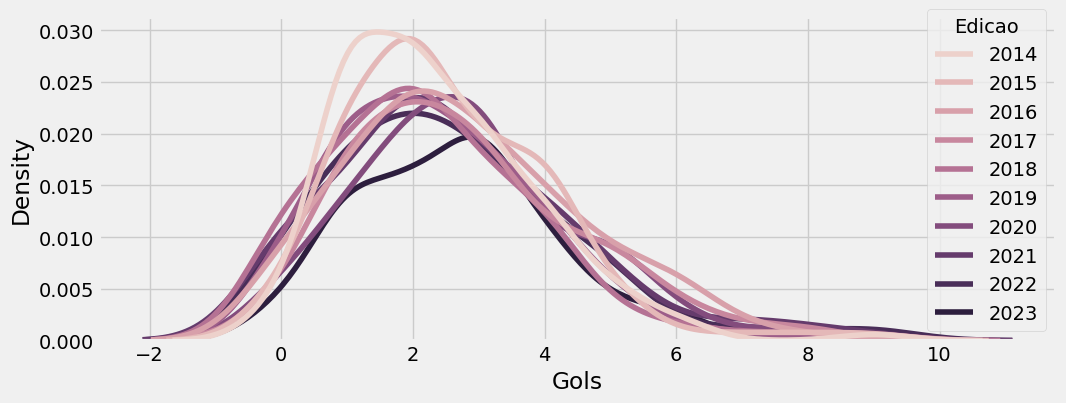

In [40]:
sns.kdeplot(data, x="Gols", hue="Edicao")

Nos anos de 2014 e 2015 o número do gols por partida era menos disperso, mas nada muito discrepante, então possivelmente o campeonato evoluiu no sentido de ser mais difícil ganhar um título mas muito por conta da melhora da capacidade físicas dos jogadores, das melhores estrátégias, etc.. 

<Axes: xlabel='Edicao', ylabel='Gols'>

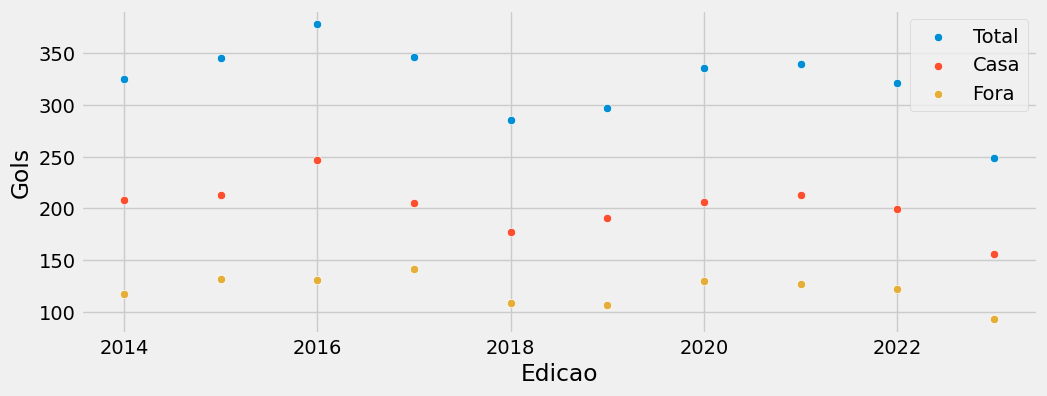

In [41]:
data_por_edicao = data.groupby('Edicao').sum()
sns.scatterplot(data=data_por_edicao, x="Edicao", y="Gols", label="Total")
sns.scatterplot(data=data_por_edicao, x="Edicao", y="Gols Casa", label="Casa")
sns.scatterplot(data=data_por_edicao, x="Edicao", y="Gols Visitante", label="Fora")

Olhando desta outra forma da para ver que o número de gols do time de casa e do time visitante carregam aproximadamente a mesma proporção de diferença, e quanto ao número total de gols partida tivemos anos com mais de 350 e anos com menos de 300 (desconsiderando o último ponto, pois é da Libertadores 2023 que ainda não acabou).

<Axes: xlabel='Edicao', ylabel='Resultado'>

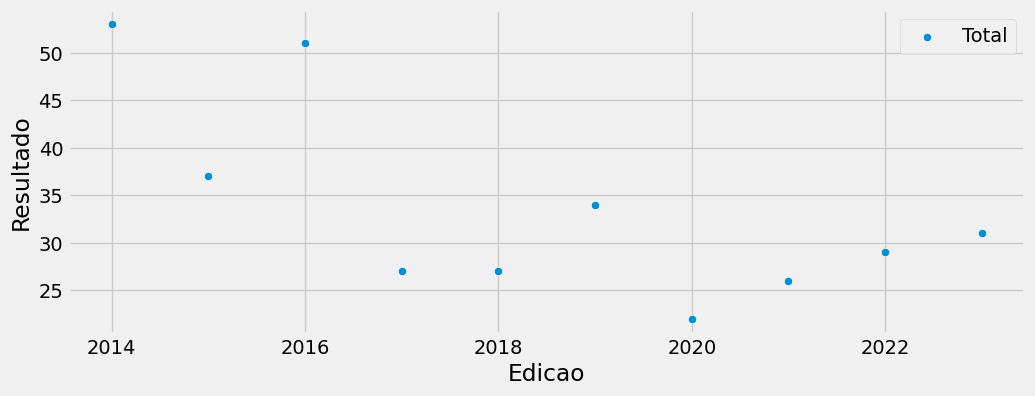

In [42]:
data_por_edicao = data.groupby('Edicao').sum()
sns.scatterplot(data=data_por_edicao, x="Edicao", y="Resultado", label="Total")

Esse gráfico nos diz uma coisa que até agora não tinhamos conseguido ver, como os resultados possiveis são 1: Vitória Casa, 0: Empate e -1: Derrota Casa, podemos dizer que a competição está mais parelha sim! 

Antes havia muito mais vitórias do que nas competições mais recentes.